In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Parte 1

In [89]:
def create_gauss_filter(h, w, k_size, sigma):
    nucleo_g = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    kernelGauss = nucleo_g * nucleo_g.T
    nx = (w-k_size)//2
    ny = (h-k_size)//2
    for i in range(0,nx):
        kernelGauss =  np.insert(kernelGauss, 0, np.zeros(k_size), axis =1)
        kernelGauss =  np.insert(kernelGauss, kernelGauss.shape[1], np.zeros(k_size), axis =1)
    if (w-k_size)%2==1:
        kernelGauss =  np.insert(kernelGauss, 0, np.zeros(k_size), axis =1)
    for i in range(0,ny):
        kernelGauss =  np.insert(kernelGauss, 0, np.zeros(kernelGauss.shape[1]), axis = 0)
        kernelGauss =  np.insert(kernelGauss, kernelGauss.shape[0], np.zeros(kernelGauss.shape[1]), axis =0)
    if (h-k_size)%2==1:
        kernelGauss =  np.insert(kernelGauss, 0, np.zeros(kernelGauss.shape[1]), axis = 0)
    gauss_filter_fourier = np.fft.fft2(kernelGauss)
    gauss_filter_fourier = np.fft.fftshift(gauss_filter_fourier)
    gauss_filter_fourier = 20*np.log(np.abs(gauss_filter_fourier))
    return kernelGauss, gauss_filter_fourier

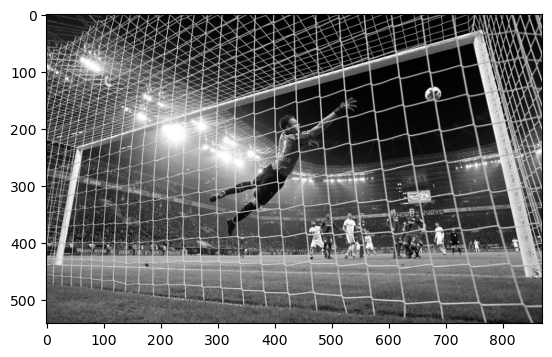

In [62]:
img = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP2/golazo.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

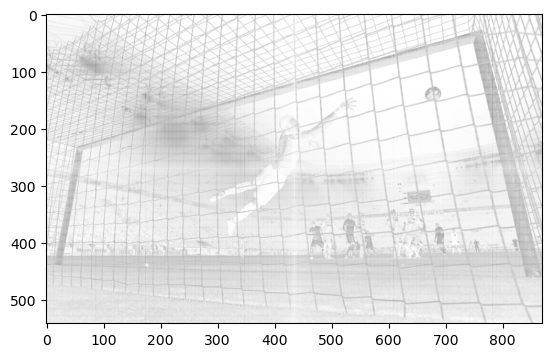

In [90]:
out = img * create_gauss_filter(img.shape[0],img.shape[1],500,400)[1]
plt.imshow(out, cmap='gray')
plt.show()